In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Setting up a basic environment

In [17]:
class Environment():
  def __init__(self,reward_probabilities,actual_reward):
    self.reward_probabilities = reward_probabilities
    self.actual_reward =actual_reward
    self.k_arms = len(self.reward_probabilities )
    if(len(self.reward_probabilities)!= len(self.actual_reward)):
      raise Exception(f"size of the reward probabilities is not equal to the size of the actual rewards")
  def choose_arm(self,arm):
      if(arm<0 or arm>= self.k_arms):
        raise Exception(f"arm bust be between 0 and {self.k_arms}")
      return self.actual_reward[arm] if(np.random.random() < self.reward_probabilities[arm]) else 0.0

In [18]:
env = Environment(reward_probabilities = [0.67,0.08,0.87,0.43], actual_reward = [1.0,1.0,1.0,1.0])

In [19]:
[env.choose_arm(3) for _ in range(10)]

[0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0]

Designing a Baseline Agent that pulls the arms randomly

In [20]:
class RandomAgent():
  def __init__(self,env,max_iterations = 500):
    self.env = env
    self.iterations = max_iterations
    #initially the reward probability of each of the arms in zero
    #it is agents task to estinate which arm has better reward probability
    #through interacting with the environment and its rewards
    self.q_values = np.zeros(self.env.k_arms) #k_arms is an instance of Environment class defined above stating how many arms are there in our env
    #technically we have k arms in our environment and arm_count simulates how many times an arm is pulled
    self.arm_count = np.zeros(self.env.k_arms) #this simulates the no of times each arm is pulled
    self.arm_rewards = np.zeros(self.env.k_arms) #total rewards we get by pulling each arm
    #we also want to know how many actual rewards we get in total by pulling different arms in total. This is imp for calculating
    #cummulative rewards
    #the length of rewards and cummulative rewards depends on the no of times an agent is interacting with the env
    self.rewards = [0.0]
    self.cum_rewards = [0.0]

  def act(self):
    for i in range(self.iterations):
      #this is simulating an agent selecting a random arm
      #since the agent do not have any strategy in our simulation so it will select the arm for pulling randomly
      arm = np.random.choice(self.env.k_arms)
      #every pulling of an arm is an action that results in the reward from the env
      reward = self.env.choose_arm(arm) #this is also an instance of the Environment class and it provides the rewards after arm pulling
      self.arm_count[arm] = self.arm_count[arm] +1 #updating the count of which arm is pulled in our list of k arms
      self.arm_rewards[arm] = self.arm_rewards[arm]+reward #updating the reward count, meaning total rewards per arm
      #calulating the reward probability by using average through increment sampling method
      self.q_values[arm] = self.q_values[arm] + (1/self.arm_count[arm]) * (reward - self.q_values[arm])
      self.rewards.append(reward)#getting all the rewards an agent gets while interacting with the env
      self.cum_rewards.append(sum(self.rewards)/len(self.rewards))
    return {"arm_counts":self.arm_count,
              "rewards":self.rewards,
              "cum_rewards":self.cum_rewards}





In [21]:
#using the same env instance of the class
test_env = Environment(reward_probabilities = [0.67,0.08,0.87,0.43], actual_reward = [1.0,1.0,1.0,1.0])

In [22]:
random_agent = RandomAgent(test_env)

In [23]:
result = random_agent.act()

In [24]:
result["arm_counts"]

array([118., 130., 119., 133.])

In [25]:
result["rewards"]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [26]:
result["cum_rewards"]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.125,
 0.1111111111111111,
 0.2,
 0.18181818181818182,
 0.25,
 0.23076923076923078,
 0.2857142857142857,
 0.26666666666666666,
 0.25,
 0.29411764705882354,
 0.3333333333333333,
 0.3684210526315789,
 0.4,
 0.42857142857142855,
 0.45454545454545453,
 0.4782608695652174,
 0.5,
 0.52,
 0.5384615384615384,
 0.5555555555555556,
 0.5714285714285714,
 0.5862068965517241,
 0.5666666666666667,
 0.5806451612903226,
 0.59375,
 0.6060606060606061,
 0.5882352941176471,
 0.6,
 0.6111111111111112,
 0.5945945945945946,
 0.6052631578947368,
 0.5897435897435898,
 0.6,
 0.5853658536585366,
 0.5714285714285714,
 0.5581395348837209,
 0.5681818181818182,
 0.5555555555555556,
 0.5652173913043478,
 0.574468085106383,
 0.5625,
 0.5510204081632653,
 0.54,
 0.5294117647058824,
 0.5192307692307693,
 0.5094339622641509,
 0.5,
 0.4909090909090909,
 0.5,
 0.5087719298245614,
 0.5,
 0.4915254237288136,
 0.48333333333333334,
 0.4918032786885246,
 0.4838709677419355,
 0.476190

In [27]:
total_rewards = sum(result["rewards"])
print(f"Total Reward : {total_rewards}")

Total Reward : 244.0


<BarContainer object of 4 artists>

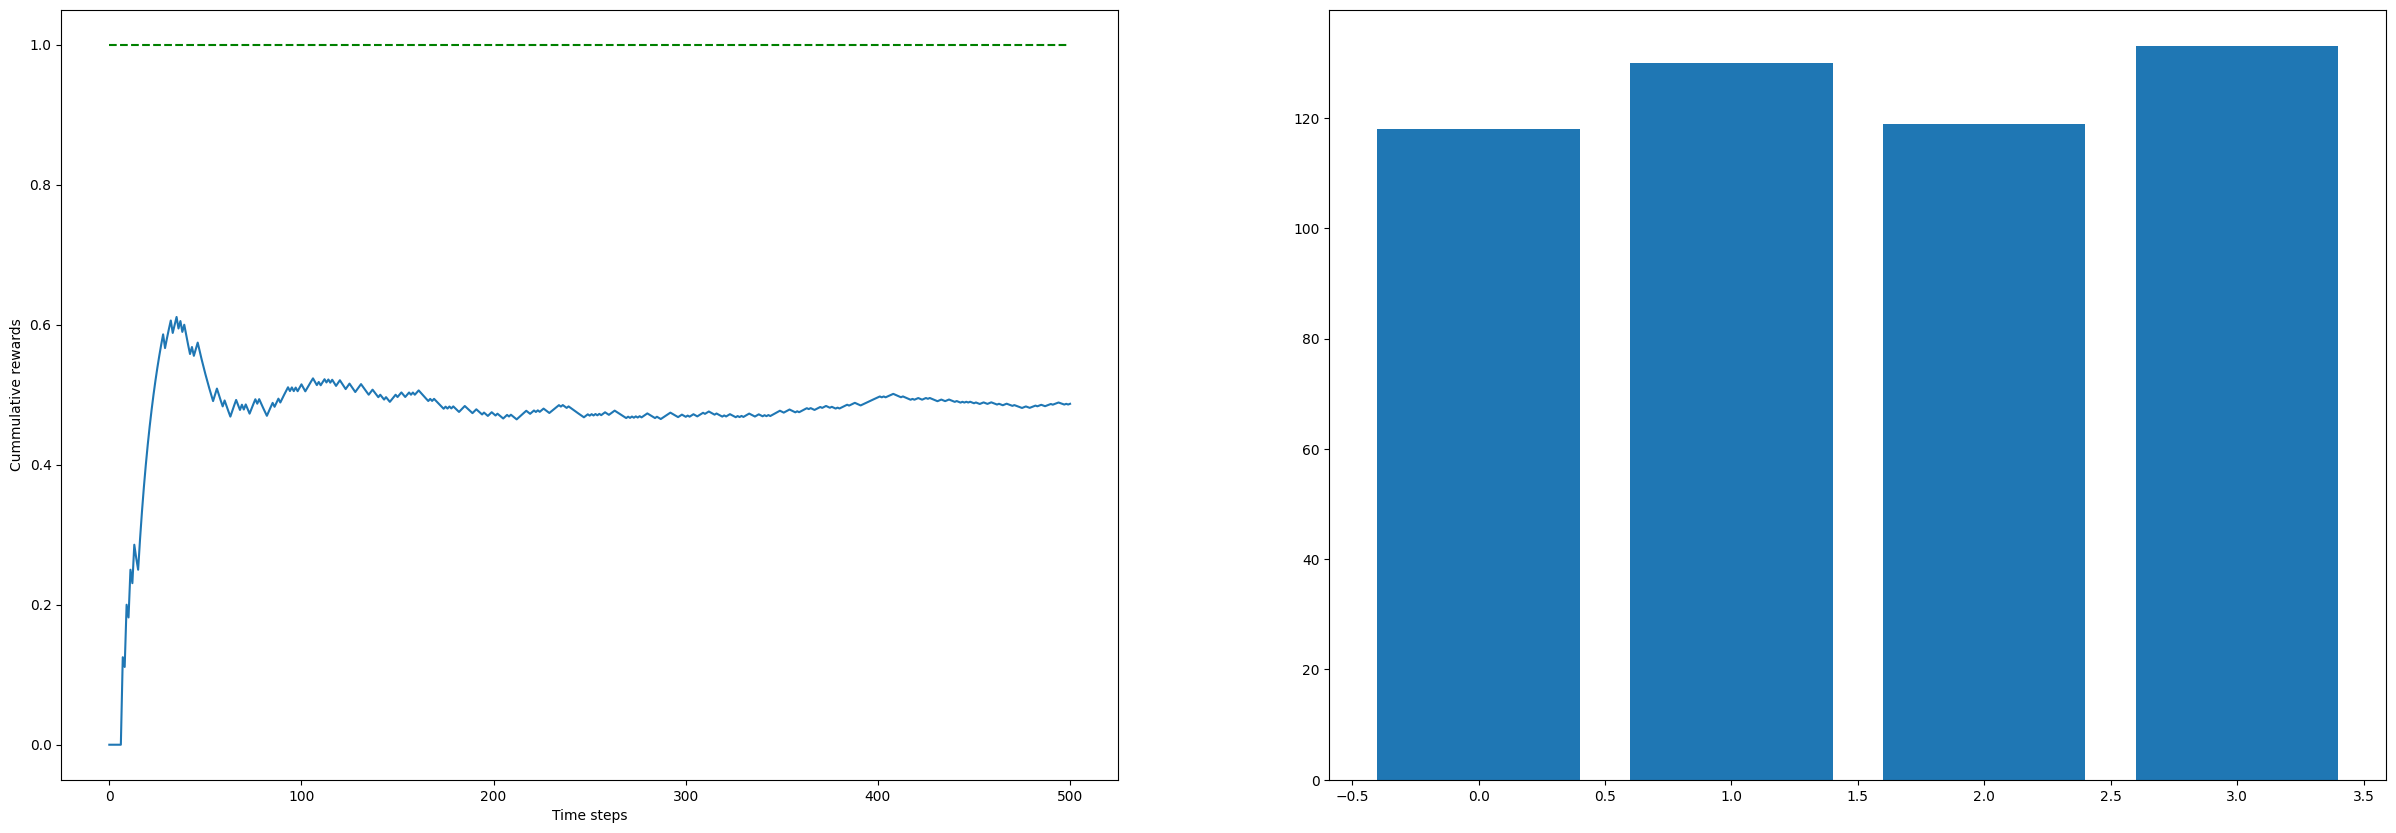

In [28]:
cum_rewards = result["cum_rewards"]
arm_counts = result["arm_counts"]

fig = plt.figure(figsize=[30,10])

ax1 = fig.add_subplot(121)
ax1.plot([1.0 for _ in range(random_agent.iterations)], "g--", label="target cummulative reward")
ax1.plot(cum_rewards, label="cummulative rewards")
ax1.set_xlabel("Time steps")
ax1.set_ylabel("Cummulative rewards")

ax2 = fig.add_subplot(122)
ax2.bar([i for i in range(len(arm_counts))], arm_counts)

In [29]:
print(f"Environment Reward Probabilities : {test_env.reward_probabilities}")
print(f"Random Agent Action Values : {random_agent.q_values}")

Environment Reward Probabilities : [0.67, 0.08, 0.87, 0.43]
Random Agent Action Values : [0.66949153 0.03076923 0.89915966 0.40601504]


Implementing a Greedy Agent

In [30]:
class GreedyAgent():
  def __init__(self,env,max_iterations = 500):
    self.env = env
    self.iterations = max_iterations
    self.q_values = np.zeros(self.env.k_arms)
    self.arm_count = np.zeros(self.env.k_arms)
    self.arm_rewards = np.zeros(self.env.k_arms)
    self.rewards = [0.0]
    self.cum_rewards = [0.0]

  def act(self):
    for i in range(self.iterations):
      #this is the only change we have done in the code to make the agent from random to greedy
      #now this agent chooses its arm on the basis of the max q_value which means once the agent gets the reward it will stick to it
      arm = np.argmax(self.q_values)
      reward = self.env.choose_arm(arm)
      self.arm_count[arm] = self.arm_count[arm] +1
      self.arm_rewards[arm] = self.arm_rewards[arm] + reward
      self.q_values[arm] = self.q_values[arm] +(1/self.q_values[arm])*(reward-self.q_values[arm])
      self.rewards.append(reward)
      self.cum_rewards.append(sum(self.rewards)/len(self.rewards))

    return {"arm_counts":self.arm_count,
              "rewards":self.rewards,
              "cum_rewards":self.cum_rewards}




In [31]:
#using the same env instance of the class
test_env = Environment(reward_probabilities = [0.67,0.08,0.87,0.43], actual_reward = [1.0,1.0,1.0,1.0])

In [32]:
greedy_agent = GreedyAgent(test_env)

In [33]:
result = greedy_agent.act()

<ipython-input-30-016daf779aac>:19: RuntimeWarning: divide by zero encountered in double_scalars
  self.q_values[arm] = self.q_values[arm] +(1/self.q_values[arm])*(reward-self.q_values[arm])
<ipython-input-30-016daf779aac>:19: RuntimeWarning: invalid value encountered in double_scalars
  self.q_values[arm] = self.q_values[arm] +(1/self.q_values[arm])*(reward-self.q_values[arm])


In [34]:
result["arm_counts"]

array([500.,   0.,   0.,   0.])

In [35]:
result["rewards"]


[0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0

In [36]:
result["cum_rewards"]

[0.0,
 0.5,
 0.3333333333333333,
 0.25,
 0.4,
 0.5,
 0.5714285714285714,
 0.625,
 0.5555555555555556,
 0.6,
 0.6363636363636364,
 0.5833333333333334,
 0.5384615384615384,
 0.5,
 0.5333333333333333,
 0.5625,
 0.5882352941176471,
 0.6111111111111112,
 0.5789473684210527,
 0.6,
 0.6190476190476191,
 0.6363636363636364,
 0.6086956521739131,
 0.5833333333333334,
 0.56,
 0.5384615384615384,
 0.5555555555555556,
 0.5714285714285714,
 0.5517241379310345,
 0.5333333333333333,
 0.5483870967741935,
 0.5625,
 0.5454545454545454,
 0.5588235294117647,
 0.5714285714285714,
 0.5833333333333334,
 0.5945945945945946,
 0.5789473684210527,
 0.5897435897435898,
 0.575,
 0.5609756097560976,
 0.5714285714285714,
 0.5813953488372093,
 0.5909090909090909,
 0.5777777777777777,
 0.5869565217391305,
 0.574468085106383,
 0.5833333333333334,
 0.5918367346938775,
 0.6,
 0.6078431372549019,
 0.6153846153846154,
 0.6226415094339622,
 0.6296296296296297,
 0.6363636363636364,
 0.625,
 0.631578947368421,
 0.6206896551724

In [37]:
total_rewards = sum(result["rewards"])
print(f"Total Reward : {total_rewards}")

Total Reward : 330.0


<BarContainer object of 4 artists>

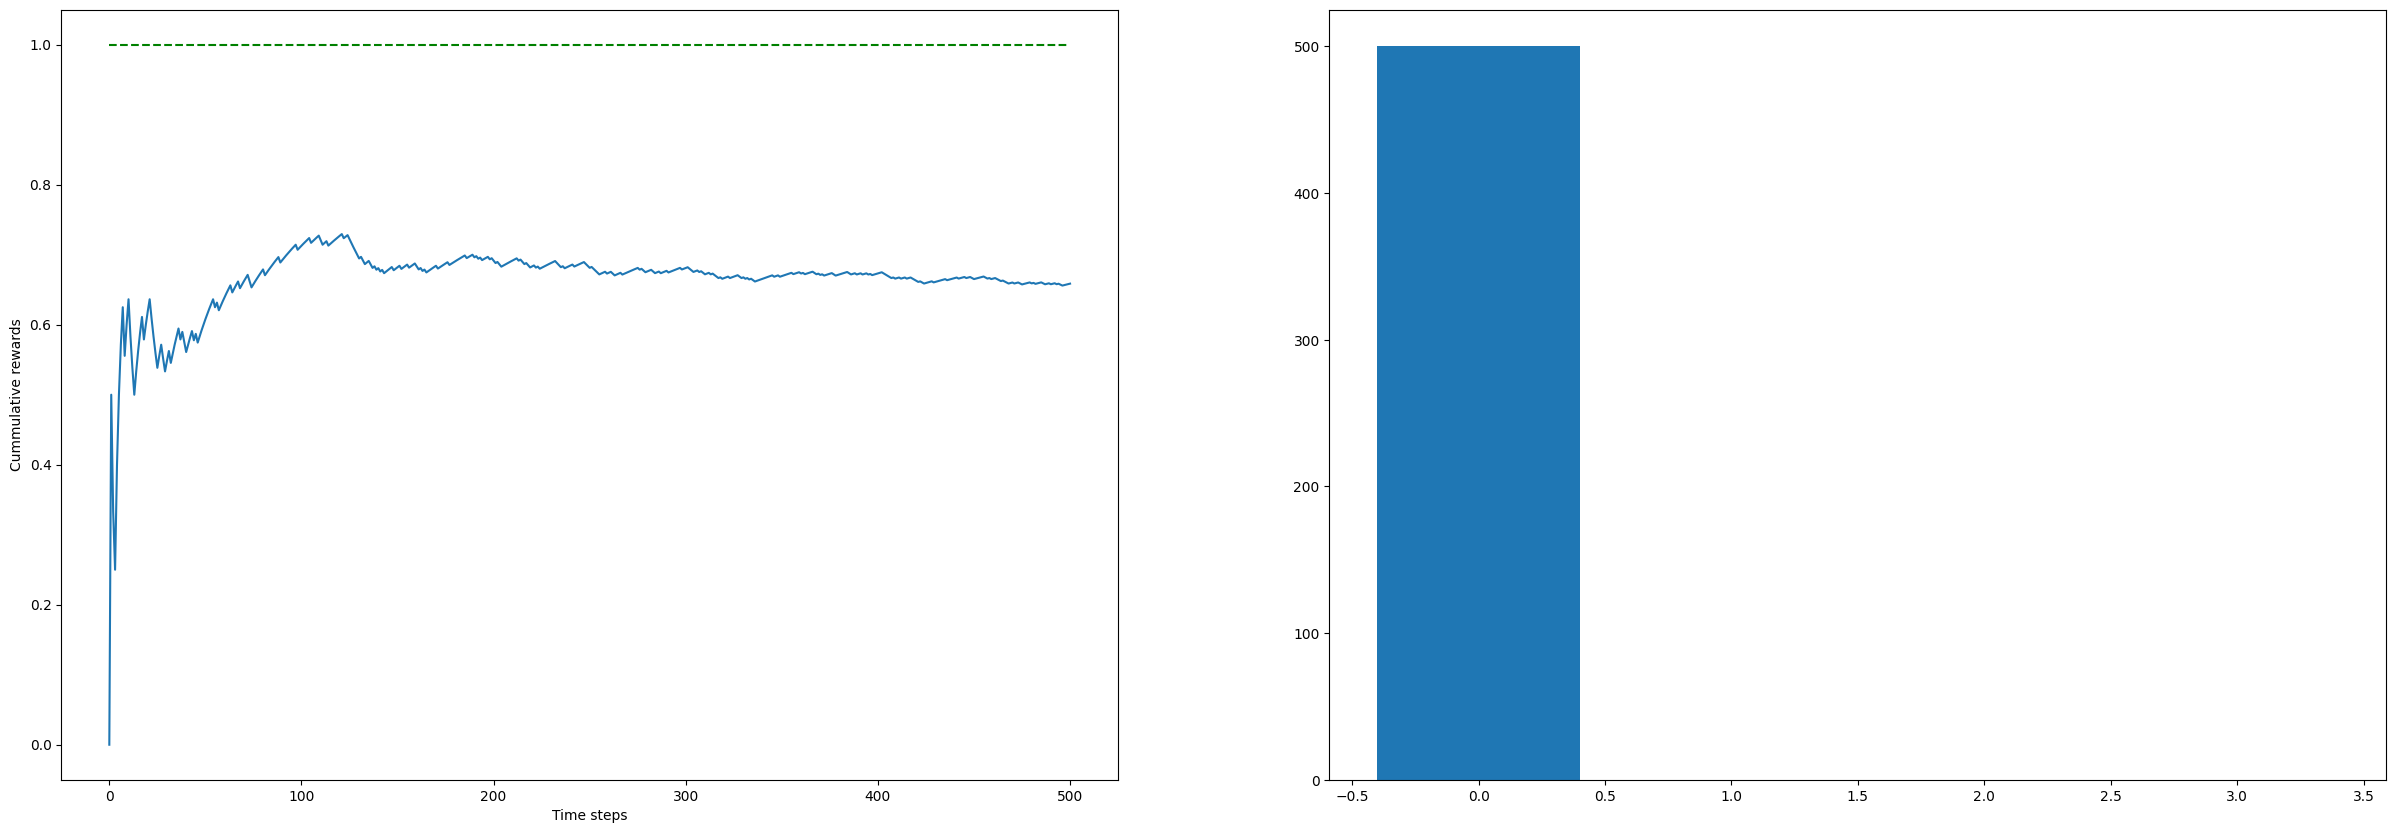

In [38]:
cum_rewards = result["cum_rewards"]
arm_counts = result["arm_counts"]

fig = plt.figure(figsize=[30,10])

ax1 = fig.add_subplot(121)
ax1.plot([1.0 for _ in range(random_agent.iterations)], "g--", label="target cummulative reward")
ax1.plot(cum_rewards, label="cummulative rewards")
ax1.set_xlabel("Time steps")
ax1.set_ylabel("Cummulative rewards")

ax2 = fig.add_subplot(122)
ax2.bar([i for i in range(len(arm_counts))], arm_counts)

In [39]:
print(f"Environment Reward Probabilities : {test_env.reward_probabilities}")
print(f"Random Agent Action Values : {greedy_agent.q_values}")

Environment Reward Probabilities : [0.67, 0.08, 0.87, 0.43]
Random Agent Action Values : [nan  0.  0.  0.]


IMPLEMENT EPSILON GREEDY AGENT

In [40]:
class EpsilonGreedyAgent():
  def __init__(self, env, max_iterations = 500, epsilon = 0.1):
    self.env = env
    self.iterations = max_iterations
    self.epsilon = epsilon
    self.q_values = np.zeros(self.env.k_arms)
    self.arm_count = np.zeros(self.env.k_arms)
    self.arm_rewards = np.zeros(self.env.k_arms)
    self.rewards = [0.0]
    self.cum_rewards = [0.0]

  def act(self):
    for i in range(self.iterations):
      #this is the only change we are doing to implement an epsilon greedy agent
      #in choosing the arm  we put the logic that if the random number is < epsilon value
      #then the agent will explore else the agent will exploit
      arm = np.random.choice(self.env.k_arms) if np.random.random() < self.epsilon else np.argmax(self.q_values)
      reward = self.env.choose_arm(arm)
      self.arm_count[arm] = self.arm_count[arm] +1
      self.arm_rewards[arm] = self.arm_rewards[arm] + reward
      self.q_values[arm] = self.q_values[arm] +(1/self.q_values[arm])*(reward-self.q_values[arm])
      self.rewards.append(reward)
      self.cum_rewards.append(sum(self.rewards)/len(self.rewards))

    return {"arm_counts":self.arm_count,
              "rewards":self.rewards,
              "cum_rewards":self.cum_rewards}


In [41]:
#using the same env instance of the class
test_env = Environment(reward_probabilities = [0.67,0.08,0.87,0.43], actual_reward = [1.0,1.0,1.0,1.0])

In [42]:
epsilon_greedy_agent = EpsilonGreedyAgent(test_env)

In [43]:
result = epsilon_greedy_agent .act()

<ipython-input-40-bb58875b5b52>:21: RuntimeWarning: divide by zero encountered in double_scalars
  self.q_values[arm] = self.q_values[arm] +(1/self.q_values[arm])*(reward-self.q_values[arm])
<ipython-input-40-bb58875b5b52>:21: RuntimeWarning: invalid value encountered in double_scalars
  self.q_values[arm] = self.q_values[arm] +(1/self.q_values[arm])*(reward-self.q_values[arm])


In [44]:
result["arm_counts"]

array([339., 143.,  10.,   8.])

In [45]:
result["rewards"]

[0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0

In [46]:
result["cum_rewards"]

[0.0,
 0.5,
 0.3333333333333333,
 0.25,
 0.2,
 0.3333333333333333,
 0.2857142857142857,
 0.25,
 0.2222222222222222,
 0.2,
 0.18181818181818182,
 0.16666666666666666,
 0.15384615384615385,
 0.14285714285714285,
 0.13333333333333333,
 0.125,
 0.11764705882352941,
 0.1111111111111111,
 0.10526315789473684,
 0.1,
 0.09523809523809523,
 0.09090909090909091,
 0.08695652173913043,
 0.08333333333333333,
 0.08,
 0.07692307692307693,
 0.07407407407407407,
 0.07142857142857142,
 0.06896551724137931,
 0.06666666666666667,
 0.06451612903225806,
 0.0625,
 0.06060606060606061,
 0.058823529411764705,
 0.05714285714285714,
 0.05555555555555555,
 0.05405405405405406,
 0.05263157894736842,
 0.07692307692307693,
 0.075,
 0.07317073170731707,
 0.07142857142857142,
 0.06976744186046512,
 0.06818181818181818,
 0.06666666666666667,
 0.06521739130434782,
 0.06382978723404255,
 0.0625,
 0.061224489795918366,
 0.06,
 0.058823529411764705,
 0.057692307692307696,
 0.05660377358490566,
 0.05555555555555555,
 0.0545

In [47]:
total_rewards = sum(result["rewards"])
print(f"Total Reward : {total_rewards}")

Total Reward : 242.0


<BarContainer object of 4 artists>

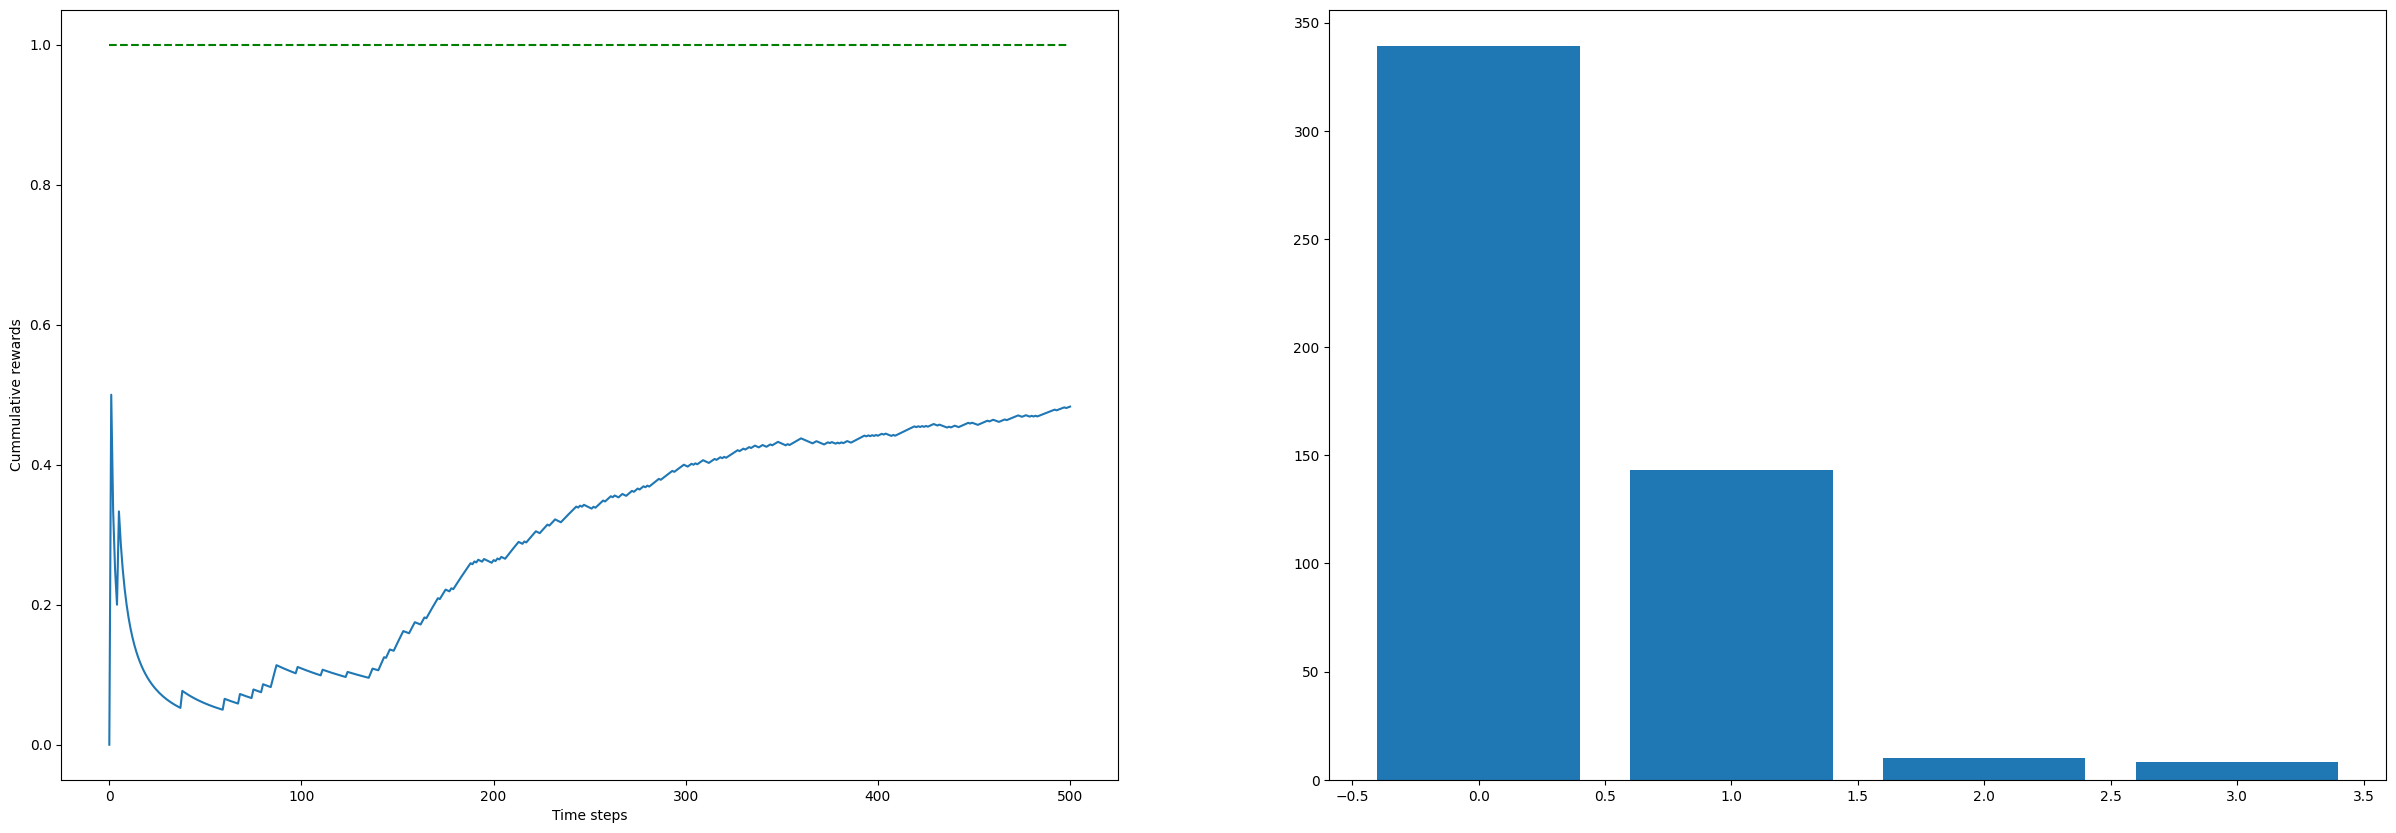

In [48]:
cum_rewards = result["cum_rewards"]
arm_counts = result["arm_counts"]

fig = plt.figure(figsize=[30,10])

ax1 = fig.add_subplot(121)
ax1.plot([1.0 for _ in range(epsilon_greedy_agent.iterations)], "g--", label="target cummulative reward")
ax1.plot(cum_rewards, label="cummulative rewards")
ax1.set_xlabel("Time steps")
ax1.set_ylabel("Cummulative rewards")

ax2 = fig.add_subplot(122)
ax2.bar([i for i in range(len(arm_counts))], arm_counts)

In [49]:
print(f"Environment Reward Probabilities : {test_env.reward_probabilities}")
print(f"Random Agent Action Values : {epsilon_greedy_agent.q_values}")

Environment Reward Probabilities : [0.67, 0.08, 0.87, 0.43]
Random Agent Action Values : [nan nan nan nan]


CONTROLING EXPLORATION WITH DECAY PARAMETER

In [50]:
class EpsilonGreedyAgent():
  def __init__(self, env, max_iterations=500, epsilon=0.01, decay_rate=0.01, decay_interval=50):
    self.env = env
    self.iterations = max_iterations
    self.epsilon = epsilon
    self.decay_rate = decay_rate
    self.decay_interval = decay_interval

    self.q_values = np.zeros(self.env.k_arms)
    self.arm_count = np.zeros(self.env.k_arms)
    self.arm_rewards = np.zeros(self.env.k_arms)

    self.rewards = [0.0]
    self.cum_rewards = [0.0]

  def act(self):
    for i in range(self.iterations):
      #this is the only change we are doing to implement an epsilon greedy agent
      #in choosing the arm  we put the logic that if the random number is < epsilon value
      #then the agent will explore else the agent will exploit
      arm = np.random.choice(self.env.k_arms) if np.random.random() < self.epsilon else np.argmax(self.q_values)
      reward = self.env.choose_arm(arm)
      self.arm_count[arm] = self.arm_count[arm] +1
      self.arm_rewards[arm] = self.arm_rewards[arm] + reward
      self.q_values[arm] = self.q_values[arm] +(1/self.q_values[arm])*(reward-self.q_values[arm])
      self.rewards.append(reward)
      self.cum_rewards.append(sum(self.rewards)/len(self.rewards))
      if(i%self.decay_interval == 0):
        self.epsilon = self.epsilon*self.decay_rate

    return {"arm_counts":self.arm_count,
              "rewards":self.rewards,
              "cum_rewards":self.cum_rewards}

In [51]:
#using the same env instance of the class
test_env = Environment(reward_probabilities = [0.67,0.08,0.87,0.43], actual_reward = [1.0,1.0,1.0,1.0])


In [52]:
epsilon_greedy_agent_cntrl = EpsilonGreedyAgent(test_env)

In [53]:

result = epsilon_greedy_agent_cntrl .act()

<ipython-input-50-689bbce81508>:25: RuntimeWarning: divide by zero encountered in double_scalars
  self.q_values[arm] = self.q_values[arm] +(1/self.q_values[arm])*(reward-self.q_values[arm])
<ipython-input-50-689bbce81508>:25: RuntimeWarning: invalid value encountered in double_scalars
  self.q_values[arm] = self.q_values[arm] +(1/self.q_values[arm])*(reward-self.q_values[arm])


In [54]:

result["arm_counts"]

array([500.,   0.,   0.,   0.])

In [55]:

result["rewards"]

[0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0

In [56]:

result["cum_rewards"]

[0.0,
 0.5,
 0.6666666666666666,
 0.75,
 0.8,
 0.6666666666666666,
 0.5714285714285714,
 0.625,
 0.6666666666666666,
 0.7,
 0.7272727272727273,
 0.75,
 0.7692307692307693,
 0.7857142857142857,
 0.8,
 0.8125,
 0.8235294117647058,
 0.8333333333333334,
 0.8421052631578947,
 0.8,
 0.8095238095238095,
 0.8181818181818182,
 0.8260869565217391,
 0.8333333333333334,
 0.84,
 0.8076923076923077,
 0.7777777777777778,
 0.7857142857142857,
 0.7586206896551724,
 0.7666666666666667,
 0.7741935483870968,
 0.75,
 0.7272727272727273,
 0.7058823529411765,
 0.7142857142857143,
 0.7222222222222222,
 0.7297297297297297,
 0.7368421052631579,
 0.7435897435897436,
 0.75,
 0.7560975609756098,
 0.7380952380952381,
 0.7209302325581395,
 0.7272727272727273,
 0.7333333333333333,
 0.7391304347826086,
 0.7446808510638298,
 0.7291666666666666,
 0.7142857142857143,
 0.72,
 0.7058823529411765,
 0.7115384615384616,
 0.7169811320754716,
 0.7222222222222222,
 0.7090909090909091,
 0.7142857142857143,
 0.7017543859649122,
 0

In [57]:


total_rewards = sum(result["rewards"])
print(f"Total Reward : {total_rewards}")

Total Reward : 340.0


<BarContainer object of 4 artists>

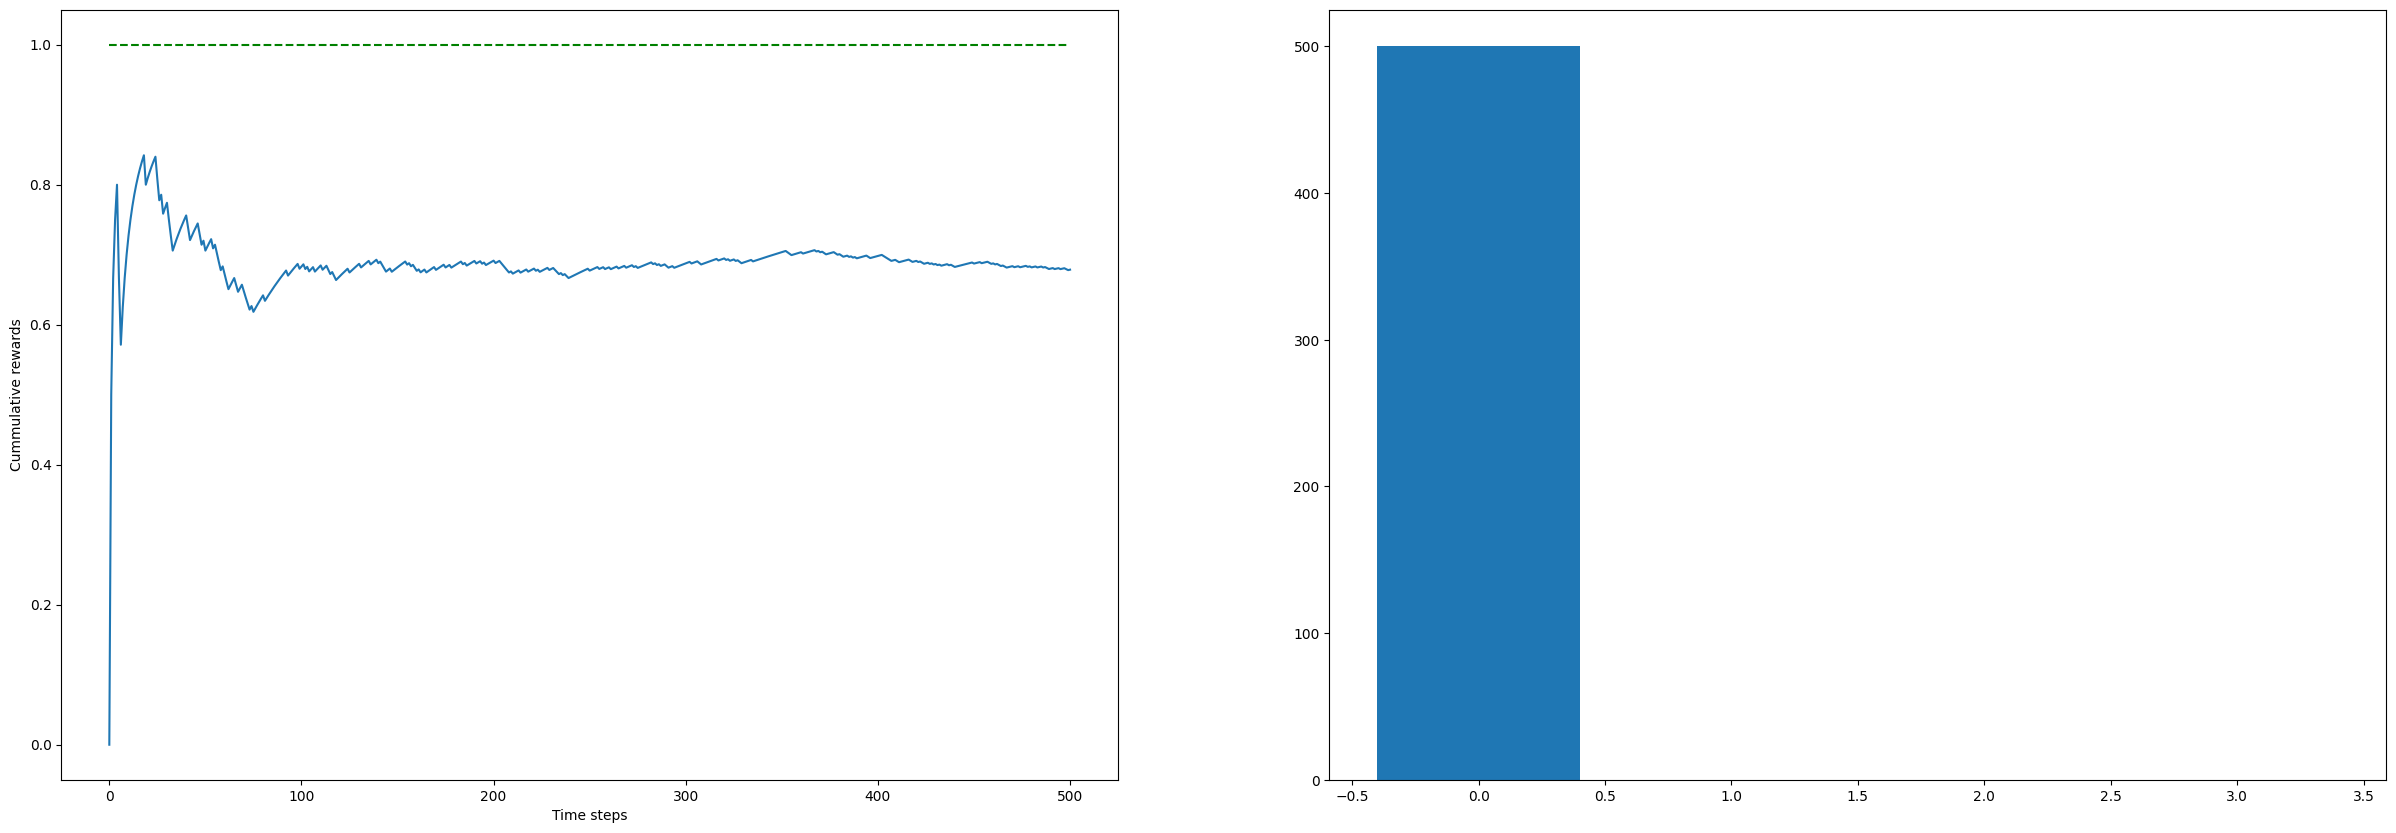

In [58]:




cum_rewards = result["cum_rewards"]
arm_counts = result["arm_counts"]

fig = plt.figure(figsize=[30,10])

ax1 = fig.add_subplot(121)
ax1.plot([1.0 for _ in range(epsilon_greedy_agent_cntrl.iterations)], "g--", label="target cummulative reward")
ax1.plot(cum_rewards, label="cummulative rewards")
ax1.set_xlabel("Time steps")
ax1.set_ylabel("Cummulative rewards")

ax2 = fig.add_subplot(122)
ax2.bar([i for i in range(len(arm_counts))], arm_counts)

SOFTMAX EXPLORATION

In [59]:
class SoftmaxExplorationAgent(object):

  def __init__(self, env, max_iterations=500, tau=0.5):
    self.env = env
    self.iterations = max_iterations
    self.tau = tau

    self.action_probas = np.zeros(self.env.k_arms)
    self.q_values = np.zeros(self.env.k_arms)
    self.arm_counts = np.zeros(self.env.k_arms)
    self.arm_rewards = np.zeros(self.env.k_arms)

    self.rewards = [0.0]
    self.cum_rewards = [0.0]

  def act(self):
    for i in range(self.iterations):
      self.action_probas = np.exp(self.q_values/self.tau) / np.sum(np.exp(self.q_values/self.tau))
      arm = np.random.choice(self.env.k_arms, p=self.action_probas)
      reward = self.env.choose_arm(arm)

      self.arm_counts[arm] = self.arm_counts[arm] + 1
      self.arm_rewards[arm] = self.arm_rewards[arm] + reward

      self.q_values[arm] = self.q_values[arm] + (1/self.arm_counts[arm]) * (reward - self.q_values[arm])
      self.rewards.append(reward)
      self.cum_rewards.append(sum(self.rewards) / len(self.rewards))

    return {"arm_counts": self.arm_counts, "rewards": self.rewards, "cum_rewards": self.cum_rewards}

In [60]:
#using the same env instance of the class
test_env = Environment(reward_probabilities = [0.67,0.08,0.87,0.43], actual_reward = [1.0,1.0,1.0,1.0])

In [61]:
test_env = Environment(reward_probabilities=[0.62, 0.05, 0.87, 0.49], actual_reward=[1.0, 1.0, 1.0, 1.0])
softmax_agent = SoftmaxExplorationAgent(test_env, tau=0.015, max_iterations=2000)
softmax_agent_result = softmax_agent.act()

In [62]:
softmax_agent_result["arm_counts"]

array([   3.,    0., 1997.,    0.])

In [63]:


softmax_agent_result["rewards"]

[0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [64]:

softmax_agent_result["cum_rewards"]

[0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.3333333333333333,
 0.42857142857142855,
 0.5,
 0.5555555555555556,
 0.6,
 0.6363636363636364,
 0.5833333333333334,
 0.6153846153846154,
 0.5714285714285714,
 0.6,
 0.5625,
 0.5882352941176471,
 0.6111111111111112,
 0.5789473684210527,
 0.6,
 0.6190476190476191,
 0.6363636363636364,
 0.6521739130434783,
 0.6666666666666666,
 0.68,
 0.6923076923076923,
 0.6666666666666666,
 0.6785714285714286,
 0.6896551724137931,
 0.7,
 0.7096774193548387,
 0.6875,
 0.696969696969697,
 0.6764705882352942,
 0.6857142857142857,
 0.6944444444444444,
 0.7027027027027027,
 0.7105263157894737,
 0.717948717948718,
 0.725,
 0.7317073170731707,
 0.7142857142857143,
 0.7209302325581395,
 0.7272727272727273,
 0.7333333333333333,
 0.717391304347826,
 0.723404255319149,
 0.7291666666666666,
 0.7142857142857143,
 0.72,
 0.7254901960784313,
 0.7115384615384616,
 0.7169811320754716,
 0.7222222222222222,
 0.7272727272727273,
 0.7321428571428571,
 0.7368421052631579,
 0.7413793103448276,


In [65]:


total_rewards = sum(softmax_agent_result["rewards"])
print(f"Total Reward : {total_rewards}")

Total Reward : 1699.0


<BarContainer object of 4 artists>

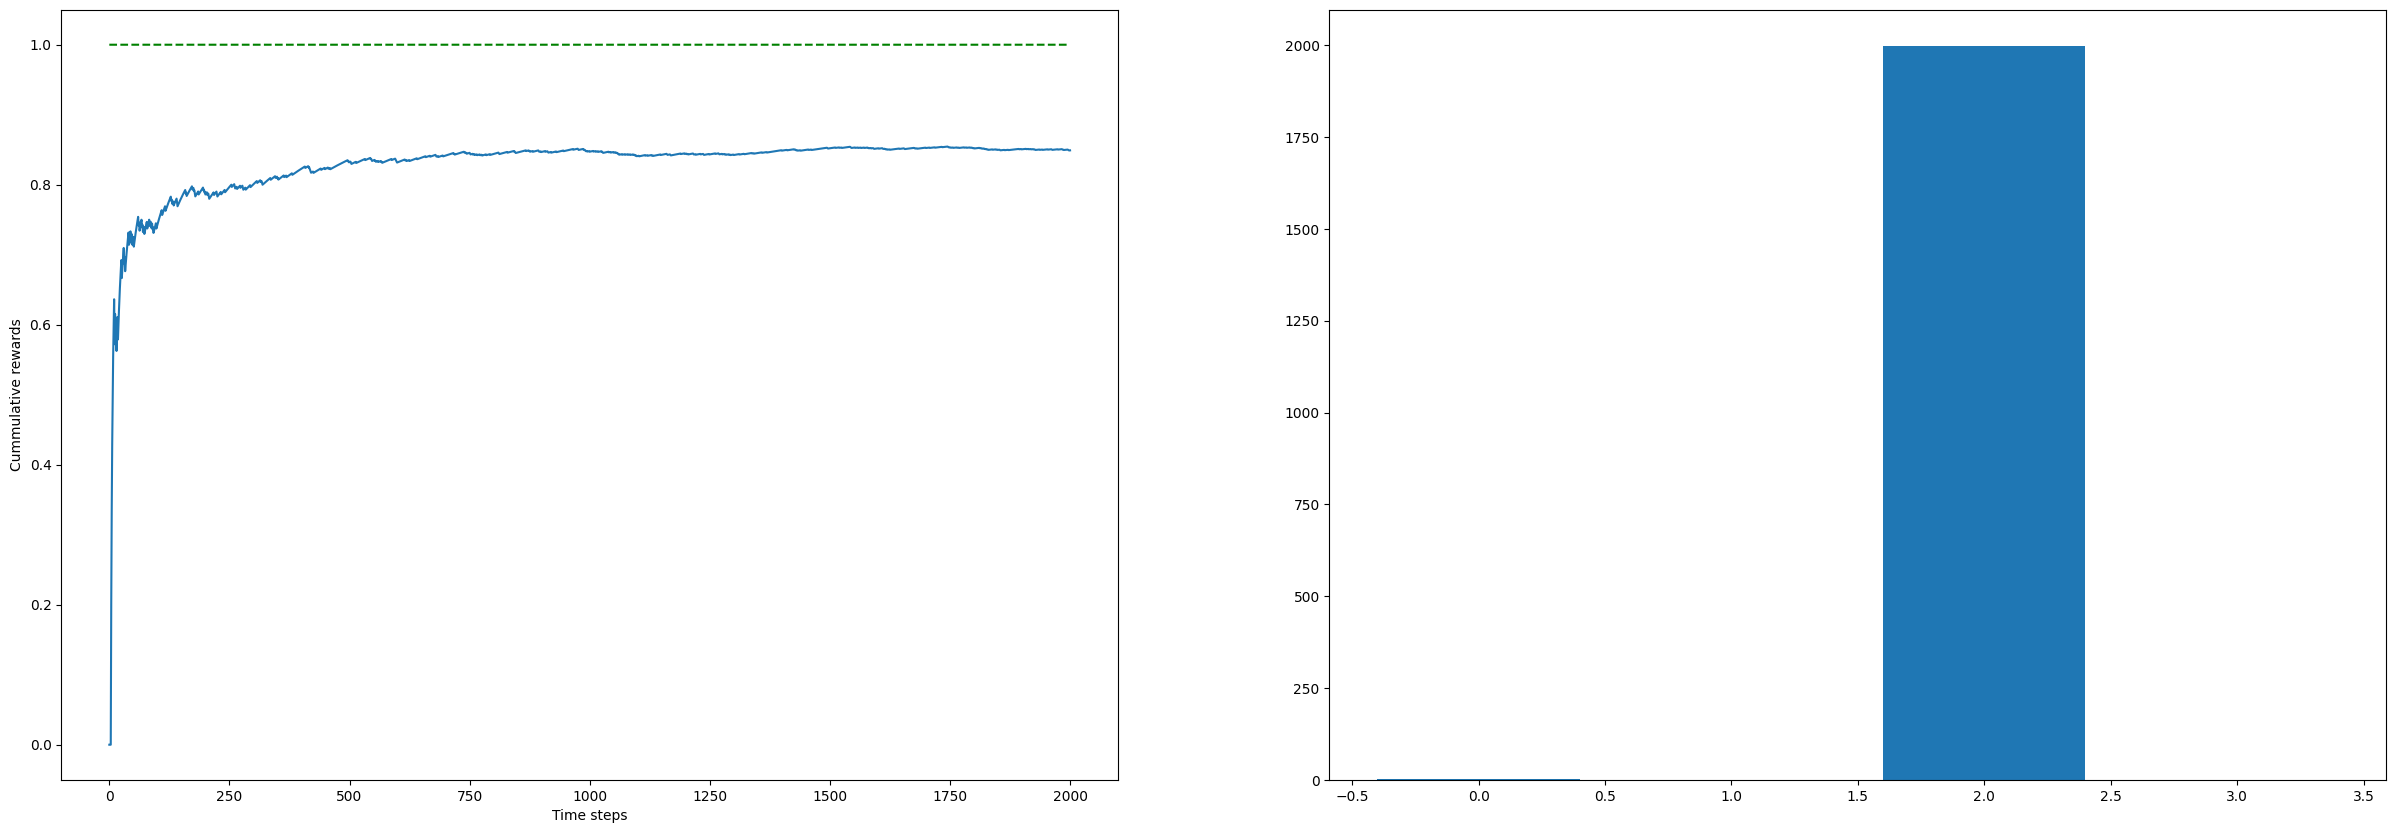

In [66]:



cum_rewards = softmax_agent_result["cum_rewards"]
arm_counts = softmax_agent_result["arm_counts"]

fig = plt.figure(figsize=[30,10])

ax1 = fig.add_subplot(121)
ax1.plot([1.0 for _ in range(softmax_agent.iterations)], "g--", label="target cummulative reward")
ax1.plot(cum_rewards, label="cummulative rewards")
ax1.set_xlabel("Time steps")
ax1.set_ylabel("Cummulative rewards")

ax2 = fig.add_subplot(122)
ax2.bar([i for i in range(len(arm_counts))], arm_counts)

OPTIMISTIC AGENT

In [67]:
class OptimisticAgent(object):

  def __init__(self, env, max_iterations=500, initial_q = 1.0, initial_visits = 50):
    self.env = env
    self.iterations = max_iterations
    self.initial_q = initial_q
    self.initial_visits = initial_visits

    self.q_values = np.ones(self.env.k_arms)* self.initial_q
    self.arm_counts = np.ones(self.env.k_arms) * initial_visits
    self.arm_rewards = np.zeros(self.env.k_arms)

    self.rewards = [0.0]
    self.cum_rewards = [0.0]

  def act(self):
    for i in range(self.iterations):
      #self.action_probas = np.exp(self.q_values/self.tau) / np.sum(np.exp(self.q_values/self.tau))
      arm = np.argmax(self.q_values)
      reward = self.env.choose_arm(arm)

      self.arm_counts[arm] = self.arm_counts[arm] + 1
      self.arm_rewards[arm] = self.arm_rewards[arm] + reward

      self.q_values[arm] = self.q_values[arm] + (1/self.arm_counts[arm]) * (reward - self.q_values[arm])
      self.rewards.append(reward)
      self.cum_rewards.append(sum(self.rewards) / len(self.rewards))

    return {"arm_counts": self.arm_counts, "rewards": self.rewards, "cum_rewards": self.cum_rewards}

In [68]:
#using the same env instance of the class
test_env = Environment(reward_probabilities = [0.67,0.08,0.87,0.43], actual_reward = [1.0,1.0,1.0,1.0])

In [69]:

optimistic_agent = OptimisticAgent(test_env)
optimistic_agent_result = optimistic_agent.act()

In [70]:
optimistic_agent_result ["arm_counts"]

array([ 77.,  60., 495.,  68.])

In [71]:
optimistic_agent_result ["rewards"]

[0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0

In [72]:
optimistic_agent_result ["cum_rewards"]

[0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.3333333333333333,
 0.2857142857142857,
 0.375,
 0.3333333333333333,
 0.4,
 0.36363636363636365,
 0.3333333333333333,
 0.38461538461538464,
 0.42857142857142855,
 0.4,
 0.375,
 0.4117647058823529,
 0.4444444444444444,
 0.47368421052631576,
 0.5,
 0.5238095238095238,
 0.5454545454545454,
 0.5652173913043478,
 0.5833333333333334,
 0.6,
 0.6153846153846154,
 0.5925925925925926,
 0.5714285714285714,
 0.5517241379310345,
 0.5666666666666667,
 0.5806451612903226,
 0.59375,
 0.6060606060606061,
 0.5882352941176471,
 0.6,
 0.5833333333333334,
 0.5945945945945946,
 0.6052631578947368,
 0.6153846153846154,
 0.625,
 0.6341463414634146,
 0.6428571428571429,
 0.6511627906976745,
 0.6363636363636364,
 0.6444444444444445,
 0.6304347826086957,
 0.6382978723404256,
 0.625,
 0.6326530612244898,
 0.62,
 0.6274509803921569,
 0.6153846153846154,
 0.6037735849056604,
 0.5925925925925926,
 0.6,
 0.5892857142857143,
 0.5964912280701754,
 0.603448275862069,
 0.5932203389830508,


In [73]:
total_rewards = sum(optimistic_agent_result ["rewards"])
print(f"Total Reward : {total_rewards}")

Total Reward : 406.0


<BarContainer object of 4 artists>

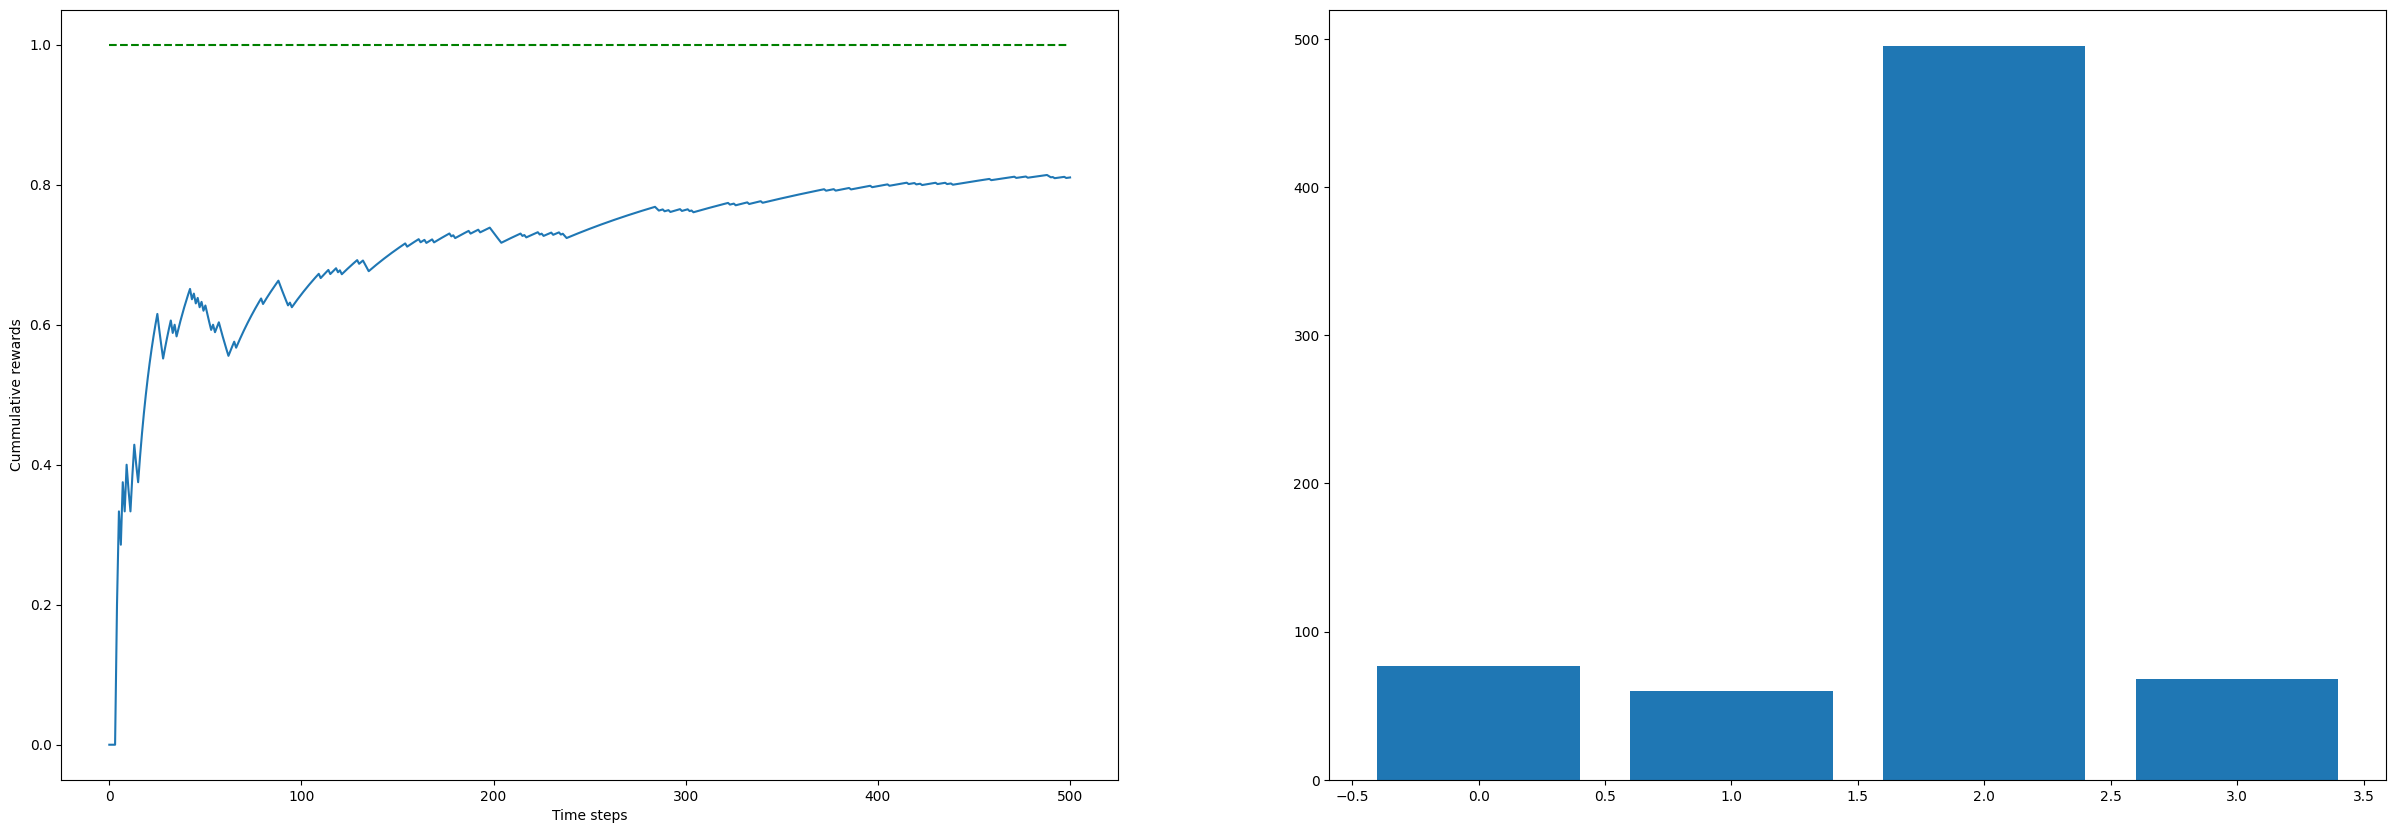

In [74]:








cum_rewards = optimistic_agent_result ["cum_rewards"]
arm_counts = optimistic_agent_result ["arm_counts"]

fig = plt.figure(figsize=[30,10])

ax1 = fig.add_subplot(121)
ax1.plot([1.0 for _ in range(optimistic_agent.iterations)], "g--", label="target cummulative reward")
ax1.plot(cum_rewards, label="cummulative rewards")
ax1.set_xlabel("Time steps")
ax1.set_ylabel("Cummulative rewards")

ax2 = fig.add_subplot(122)
ax2.bar([i for i in range(len(arm_counts))], arm_counts)

UCB ALGO

In [78]:
class UCBAgent(object):

  def __init__(self, env, c=2, max_iterations=500):
    self.env = env
    self.c = c
    self.iterations = max_iterations

    self.q_values = np.zeros(self.env.k_arms, dtype=np.float32)
    self.arm_counts = np.zeros(self.env.k_arms, dtype=np.int)
    self.arm_rewards = np.zeros(self.env.k_arms, dtype=np.float32)

    self.rewards = [0.0]
    self.cum_rewards = [0.0]

  def act(self):
    for i in range(0, self.iterations):
      if i < len(self.q_values):
        arm = i
      else:
        U = self.c * np.sqrt(np.log(i) / self.arm_counts)
        arm = np.argmax(self.q_values + U)

      reward = self.env.choose_arm(arm)

      self.arm_rewards[arm] += reward
      self.arm_counts[arm] += 1
      self.q_values[arm] = self.q_values[arm] + (1/self.arm_counts[arm]) * (reward - self.q_values[arm])

      self.rewards.append(reward)
      self.cum_rewards.append(sum(self.rewards)/len(self.rewards))

    return {"arm_counts" : self.arm_counts, "rewards": self.rewards, "cum_rewards": self.cum_rewards}


In [80]:
test_env = Environment(reward_probabilities=[0.62, 0.05, 0.87, 0.49], actual_reward=[1.0, 1.0, 1.0, 1.0])
ucb_agent = UCBAgent(test_env, c=1)
ucb_agent_result = ucb_agent.act()

<ipython-input-78-6826c47684a1>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.arm_counts = np.zeros(self.env.k_arms, dtype=np.int)


In [81]:
total_rewards = sum(ucb_agent_result["rewards"])
print(f"Total Reward : {total_rewards}")

Total Reward : 412.0


<BarContainer object of 4 artists>

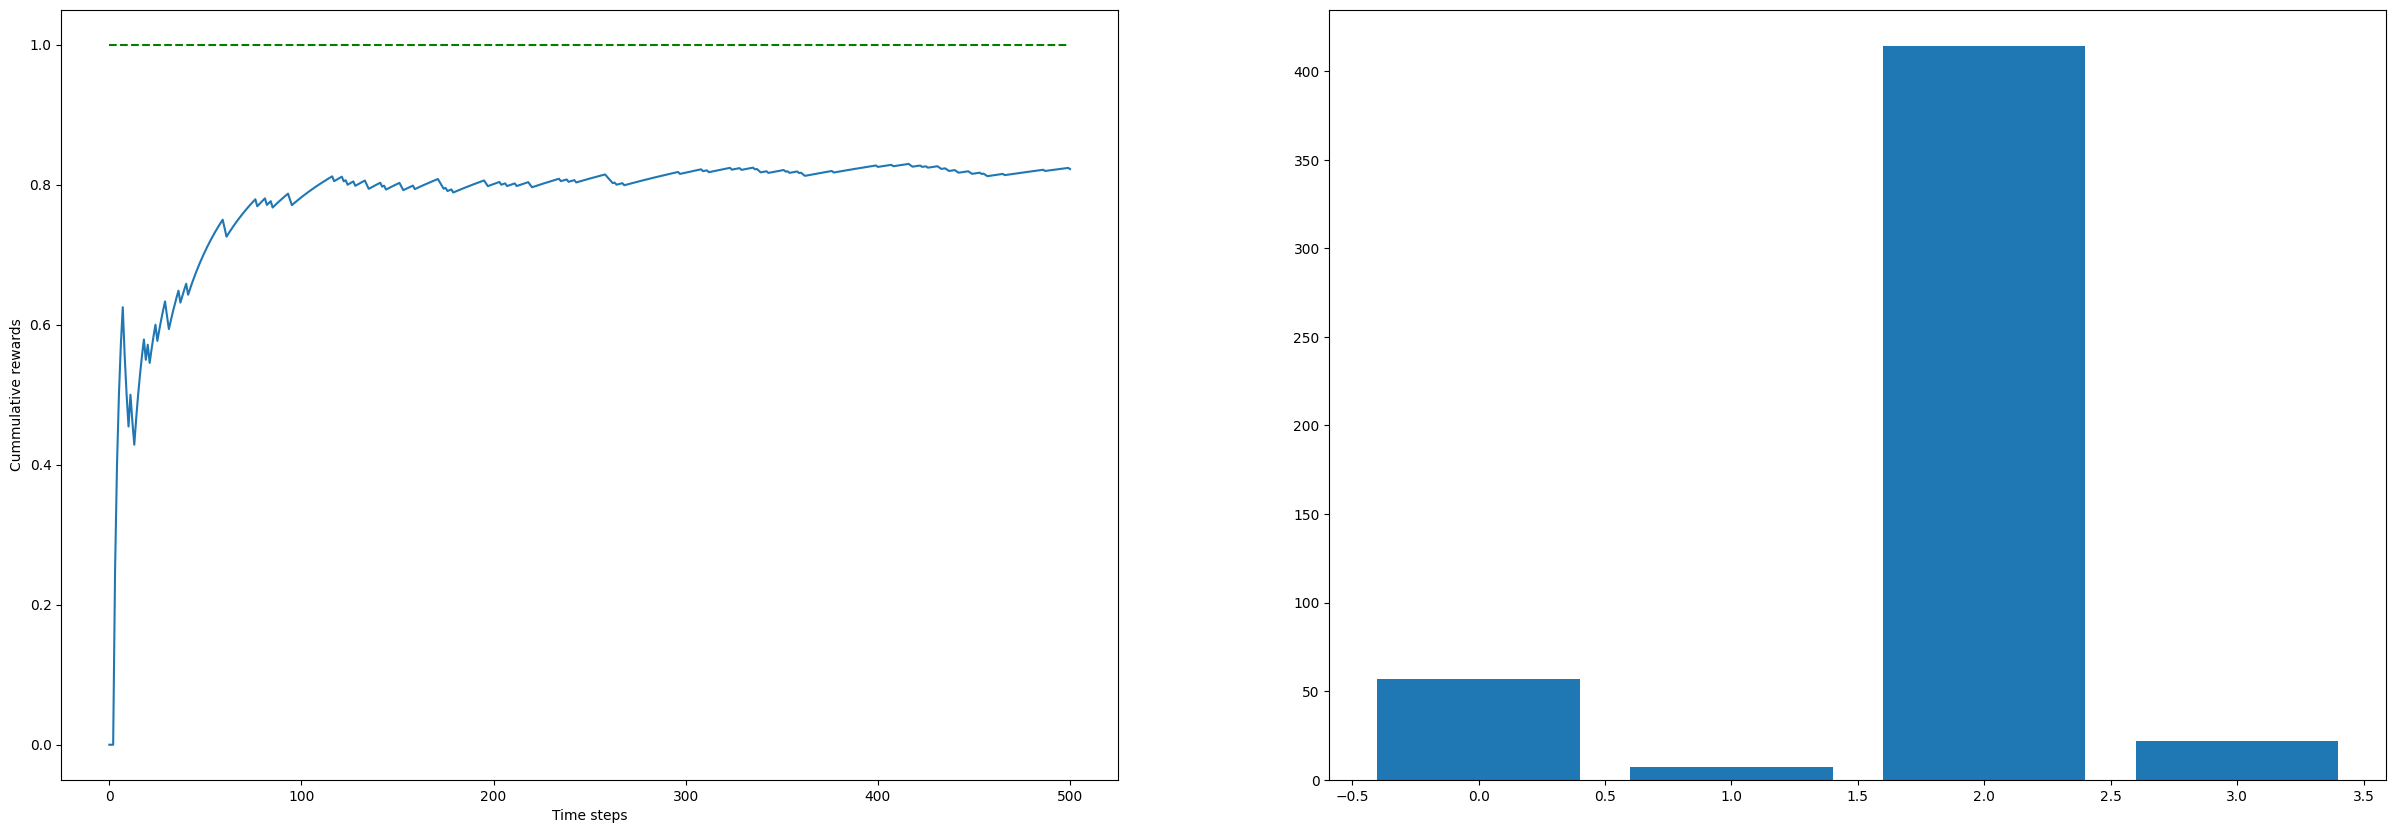

In [82]:
cum_rewards = ucb_agent_result["cum_rewards"]
arm_counts = ucb_agent_result["arm_counts"]

fig = plt.figure(figsize=[30,10])

ax1 = fig.add_subplot(121)
ax1.plot([1.0 for _ in range(ucb_agent.iterations)], "g--", label="target cummulative reward")
ax1.plot(cum_rewards, label="cummulative rewards")
ax1.set_xlabel("Time steps")
ax1.set_ylabel("Cummulative rewards")

ax2 = fig.add_subplot(122)
ax2.bar([i for i in range(len(arm_counts))], arm_counts)